Third step: second feature engineering & model building

In [1]:
import pandas as pd

df = pd.read_csv('/Users/aklat/Downloads/Thsesis/Datasets/Moral Machine Data/1123_final_join_1.csv')

In [3]:
import pandas as pd

df = pd.read_csv('/Users/aklat/Downloads/Thsesis/Datasets/Moral Machine Data/1123_final_join_1.csv')

# convert float columns to int
float_cols = df.select_dtypes(include=['float64']).columns.tolist()
df[float_cols] = df[float_cols].astype(int)
df['Man'] = df['Man'].astype(float).round(0).astype(int)

# tranform to new features
df['Male'] = df['Man'] + df['OldMan'] + df['Boy'] + df['MaleExecutive'] + df['MaleAthlete'] + df['MaleDoctor'] + df['LargeMan']
df['Female'] = df['Woman'] + df['OldWoman'] + df['Girl'] + df['FemaleExecutive'] + df['FemaleAthlete'] + df['FemaleDoctor'] + df['LargeWoman']
df['Vulnerable'] = df['Pregnant'] + df['Stroller']
df['Children'] = df['Boy'] + df['Girl']  
df['Adult'] = df['Man'] + df['Woman'] + df['MaleExecutive'] + df['FemaleExecutive'] + df['FemaleAthlete'] + df['MaleAthlete'] + df['FemaleDoctor'] + df['MaleDoctor'] + df['LargeWoman'] + df['LargeMan']  
df['Senior'] = df['OldMan'] + df['OldWoman']  
df['Large'] = df['LargeMan'] + df['LargeWoman']  
df['Profession'] = df['MaleExecutive'] + df['FemaleExecutive'] + df['FemaleAthlete'] + df['MaleAthlete'] + df['FemaleDoctor'] + df['MaleDoctor']  
df['Criminal'] = df['Criminal']  
df['Homeless'] = df['Homeless']  
df['Animal'] = df['Dog'] + df['Cat'] 
df['ProfessionalMale'] = df['MaleExecutive'] + df['MaleAthlete'] + df['MaleDoctor'] 
df['ProfessionalFemale'] = df['FemaleExecutive'] + df['FemaleAthlete'] + df['FemaleDoctor'] 

In [7]:
df_grouped.columns

Index(['Unnamed: 0', 'Unnamed: 0_x', 'UserID', 'Review_gender', 'Unnamed: 0_y',
       'ResponseID', 'ExtendedSessionID', 'ScenarioOrder', 'Intervention',
       'PedPed', 'Barrier', 'CrossingSignal', 'NumberOfCharacters',
       'DiffNumberOFCharacters', 'Saved', 'Man', 'Woman', 'Pregnant',
       'Stroller', 'OldMan', 'OldWoman', 'Boy', 'Girl', 'Homeless',
       'LargeWoman', 'LargeMan', 'Criminal', 'MaleExecutive',
       'FemaleExecutive', 'FemaleAthlete', 'MaleAthlete', 'FemaleDoctor',
       'MaleDoctor', 'Dog', 'Cat', 'Male', 'Female', 'Vulnerable', 'Children',
       'Adult', 'Senior', 'Large', 'Profession', 'Animal', 'PofessionalMale',
       'ProfessionalFemale', 'if_cross_by_rule', 'if_more_people',
       'if_more_male', 'if_more_female', 'if_more_young_male',
       'if_more_young_female', 'if_more_senior_male', 'if_more_senior_female',
       'if_more_large_male', 'if_more_large_female',
       'if_more_professional_male'],
      dtype='object')

In [12]:
selected_columns = ['UserID', 'Reiveiew_gender', 'ResponseID', 'ExtendedSessionID', 'ScenarioOrder', 'Intervention', 'PedPed',
                    'Barrier', 'CrossingSignal', 'NumberOfCharacters', 'DiffNumberOFCharacters', 'Saved', 
                    'Male', 'Female', 'Pregnant', 'Baby', 'Children', 'Adult', 'Senior', 'Large', 
                    'Profession', 'Criminal', 'Homeless', 'Animal']

df_selected = df

df_grouped = df_selected.copy()

# group by 'ResponseID'，compare within the group, more would be set as 1, less would be set as -1, equal set as 0 
grouped = df_grouped.groupby('ResponseID')
def compare_feature(group, feature_name):
    result = [0] * len(group)
    
    if len(group) == 2:
        # Compare the feature values between the two rows
        if group.iloc[0][feature_name] > group.iloc[1][feature_name]:
            result[0], result[1] = 1, -1
        elif group.iloc[0][feature_name] < group.iloc[1][feature_name]:
            result[0], result[1] = -1, 1
    
    # Return the result as a pandas Series with the correct index
    return pd.Series(result, index=group.index)

# Apply the functions to calculate each new feature and store them in the dataframe

# 1. Cross by rule
df_grouped['if_cross_by_rule'] = df_grouped['CrossingSignal'].apply(lambda x: -1 if x == 2 else x)

# 2. Compare NumberOfCharacters
df_grouped['if_more_people'] = grouped.apply(lambda x: compare_feature(x, 'NumberOfCharacters')).reset_index(level=0, drop=True)

# # 3. Compare Male (based on Male proportion over Male + Female)
# def compare_male_proportion(group):
#     result = [0] * len(group)
#     if len(group) == 2:
#         male_female_ratio_0 = group.iloc[0]['Male'] / (group.iloc[0]['Male'] + group.iloc[0]['Female'] + 1e-6)  # Avoid division by zero
#         male_female_ratio_1 = group.iloc[1]['Male'] / (group.iloc[1]['Male'] + group.iloc[1]['Female'] + 1e-6)
#         if male_female_ratio_0 > male_female_ratio_1:
#             result[0], result[1] = 1, -1
#         elif male_female_ratio_0 < male_female_ratio_1:
#             result[0], result[1] = -1, 1
    # return pd.Series(result, index=group.index)
# 3. compare male and female

df_grouped['if_more_male'] = grouped.apply(lambda x: compare_feature(x, 'Male')).reset_index(level=0, drop=True)
df_grouped['if_more_female'] = grouped.apply(lambda x: compare_feature(x, 'Female')).reset_index(level=0, drop=True)
df_grouped['if_more_young_male'] = grouped.apply(lambda x: compare_feature(x, 'Boy')).reset_index(level=0, drop=True)
df_grouped['if_more_young_female'] = grouped.apply(lambda x: compare_feature(x, 'Girl')).reset_index(level=0, drop=True)
df_grouped['if_more_senior_male'] = grouped.apply(lambda x: compare_feature(x, 'OldMan')).reset_index(level=0, drop=True)
df_grouped['if_more_senior_female'] = grouped.apply(lambda x: compare_feature(x, 'OldWoman')).reset_index(level=0, drop=True)
df_grouped['if_more_large_male'] = grouped.apply(lambda x: compare_feature(x, 'LargeMan')).reset_index(level=0, drop=True)
df_grouped['if_more_large_female'] = grouped.apply(lambda x: compare_feature(x, 'LargeWoman')).reset_index(level=0, drop=True)
df_grouped['if_more_professional_male'] = grouped.apply(lambda x: compare_feature(x, 'PofessionalMale')).reset_index(level=0, drop=True)
df_grouped['if_more_professional_female'] = grouped.apply(lambda x: compare_feature(x, 'ProfessionalFemale')).reset_index(level=0, drop=True)

# 4. Compare Vulnerable (Pregnant + Baby)
df_grouped['if_more_vulnerable'] = grouped.apply(lambda x: compare_feature(x, 'Vulnerable')).reset_index(level=0, drop=True)

# 5. Compare Children
df_grouped['if_more_children'] = grouped.apply(lambda x: compare_feature(x, 'Children')).reset_index(level=0, drop=True)

# 6. Compare Senior
df_grouped['if_more_senior'] = grouped.apply(lambda x: compare_feature(x, 'Senior')).reset_index(level=0, drop=True)

# 7. Compare Criminal
df_grouped['if_more_criminal'] = grouped.apply(lambda x: compare_feature(x, 'Criminal')).reset_index(level=0, drop=True)

# 8. Compare Homeless
df_grouped['if_more_homeless'] = grouped.apply(lambda x: compare_feature(x, 'Homeless')).reset_index(level=0, drop=True)

# 9. Compare Profession
df_grouped['if_more_profession'] = grouped.apply(lambda x: compare_feature(x, 'Profession')).reset_index(level=0, drop=True)

# 10. Compare Large (indicating large-sized individuals)
df_grouped['if_more_large'] = grouped.apply(lambda x: compare_feature(x, 'Large')).reset_index(level=0, drop=True)

# 11. Compare Animal
df_grouped['if_more_animal'] = grouped.apply(lambda x: compare_feature(x, 'Animal')).reset_index(level=0, drop=True)

/var/folders/x5/b6qvk1zx3dg9d_8_8zt4hf3m0000gn/T/ipykernel_49002/2446352444.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_grouped['if_more_vulnerable'] = grouped.apply(lambda x: compare_feature(x, 'Vulnerable')).reset_index(level=0, drop=True)
/var/folders/x5/b6qvk1zx3dg9d_8_8zt4hf3m0000gn/T/ipykernel_49002/2446352444.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_grouped['if_more_children'

In [13]:
df_grouped.columns

Index(['Unnamed: 0', 'Unnamed: 0_x', 'UserID', 'Review_gender', 'Unnamed: 0_y',
       'ResponseID', 'ExtendedSessionID', 'ScenarioOrder', 'Intervention',
       'PedPed', 'Barrier', 'CrossingSignal', 'NumberOfCharacters',
       'DiffNumberOFCharacters', 'Saved', 'Man', 'Woman', 'Pregnant',
       'Stroller', 'OldMan', 'OldWoman', 'Boy', 'Girl', 'Homeless',
       'LargeWoman', 'LargeMan', 'Criminal', 'MaleExecutive',
       'FemaleExecutive', 'FemaleAthlete', 'MaleAthlete', 'FemaleDoctor',
       'MaleDoctor', 'Dog', 'Cat', 'Male', 'Female', 'Vulnerable', 'Children',
       'Adult', 'Senior', 'Large', 'Profession', 'Animal', 'PofessionalMale',
       'ProfessionalFemale', 'if_cross_by_rule', 'if_more_people',
       'if_more_male', 'if_more_female', 'if_more_young_male',
       'if_more_young_female', 'if_more_senior_male', 'if_more_senior_female',
       'if_more_large_male', 'if_more_large_female',
       'if_more_professional_male', 'if_more_professional_female',
       'if_more_v

In [14]:
df_grouped.to_csv('1225_feature2.csv')

In [15]:
df = df_grouped

Spilt train/test/val while making sure same ResponseID's two rows are placed into same datasets

In [1]:
import pandas as pd
df = pd.read_csv('1225_feature2.csv')

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GroupShuffleSplit
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# important_features = ['if_cross_by_rule', 'if_more_people',
#        'if_more_male', 'if_more_female', 'if_more_young_male',
#        'if_more_young_female', 'if_more_senior_male', 'if_more_senior_female',
#        'if_more_large_male', 'if_more_large_female',
#        'if_more_professional_male', 'if_more_professional_female',
#        'if_more_vulnerable', 'if_more_children', 'if_more_senior',
#        'if_more_criminal', 'if_more_homeless', 'if_more_profession',
#        'if_more_large', 'if_more_animal']
important_features = ['if_cross_by_rule', 'if_more_people',
       'if_more_male', 'if_more_female', 
       'if_more_vulnerable', 'if_more_children', 'if_more_senior',
       'if_more_criminal', 'if_more_homeless', 'if_more_profession',
       'if_more_large', 'if_more_animal']

X = df[important_features]
y = df['Saved']
response_ids = df['ResponseID']

# A faster splitting method uses GroupShuffleSplit to ensure that samples with the same ResponseID are assigned to the same dataset
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(gss.split(X, y, groups=response_ids))

train_val_df = df.iloc[train_idx]
test_df = df.iloc[test_idx]

# split val&test
gss_val = GroupShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
train_idx, val_idx = next(gss_val.split(train_val_df[important_features], train_val_df['Saved'], groups=train_val_df['ResponseID']))

train_df = train_val_df.iloc[train_idx]
val_df = train_val_df.iloc[val_idx]

X_train = train_df[important_features]
y_train = train_df['Saved']
X_val = val_df[important_features]
y_val = val_df['Saved']
X_test = test_df[important_features]
y_test = test_df['Saved']

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class RankNetDataset(Dataset):
    def __init__(self, df, features):
        self.features = df[features].values
        self.labels = df['Saved'].values
        self.response_ids = df['ResponseID'].values

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        features = torch.tensor(self.features[idx], dtype=torch.float32)
        labels = torch.tensor(self.labels[idx], dtype=torch.float32)
        response_id = self.response_ids[idx]
        return features, labels, response_id

class RankNet(nn.Module):
    def __init__(self, input_dim):
        super(RankNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

class RankNetModel:
    def __init__(self, features, model_path='ranknet_model.pth'):
        self.features = features
        self.model_path = model_path
        self.model = RankNet(len(features))

    def train(self, train_df, val_df, batch_size=32, epochs=50, patience=5, learning_rate=0.0005):
        train_dataset = RankNetDataset(train_df, self.features)
        val_dataset = RankNetDataset(val_df, self.features)

        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

        criterion = nn.BCEWithLogitsLoss()
        optimizer = optim.Adam(self.model.parameters(), lr=learning_rate, weight_decay=1e-4)

        best_val_loss = float('inf')
        patience_counter = 0

        for epoch in range(epochs):
            self.model.train()
            train_loss = 0.0
            for features, labels, _ in train_loader:
                labels = labels.view(-1, 1)
                optimizer.zero_grad()
                outputs = self.model(features)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                train_loss += loss.item()
            print(f"Epoch {epoch+1}/{epochs}, Train Loss: {train_loss / len(train_loader):.4f}")

            self.model.eval()
            val_loss = 0.0
            with torch.no_grad():
                for features, labels, _ in val_loader:
                    labels = labels.view(-1, 1)
                    outputs = self.model(features)
                    loss = criterion(outputs, labels)
                    val_loss += loss.item()
            val_loss /= len(val_loader)
            print(f"Validation Loss: {val_loss:.4f}")

            if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience_counter = 0
                torch.save(self.model.state_dict(), self.model_path)
            else:
                patience_counter += 1
                if patience_counter >= patience:
                    print("Early stopping triggered.")
                    break

    def load_model(self):
        self.model.load_state_dict(torch.load(self.model_path))
        self.model.eval()

    def predict(self, test_df, batch_size=32):
        test_dataset = RankNetDataset(test_df, self.features)
        test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

        predictions = []
        with torch.no_grad():
            for features, labels, response_ids in test_loader:
                outputs = torch.sigmoid(self.model(features)).view(-1)
                for i in range(len(response_ids)):
                    predictions.append((response_ids[i], outputs[i].item(), labels[i].item()))

        predictions_df = pd.DataFrame(predictions, columns=['ResponseID', 'Predicted Probability', 'True Label'])

        # Update the logic to group by ResponseID and assign Predicted Saved
        final_predictions = []
        for response_id, group in predictions_df.groupby('ResponseID'):
            group = group.sort_values(by='Predicted Probability', ascending=False)
            group['Predicted Saved'] = [1 if idx == 0 else 0 for idx in range(len(group))]
            final_predictions.append(group)

        return pd.concat(final_predictions)

    def evaluate(self, predictions_df):
        y_true = predictions_df['True Label']
        y_pred = predictions_df['Predicted Saved']

        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        roc_auc = roc_auc_score(y_true, predictions_df['Predicted Probability'])

        print(f"\nModel Performance Metrics:\nAccuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1 Score: {f1:.4f}\nROC AUC: {roc_auc:.4f}")

        conf_matrix = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Saved', 'Saved'], yticklabels=['Not Saved', 'Saved'])
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title('Confusion Matrix')
        plt.show()

Epoch 1/50, Train Loss: 0.5539
Validation Loss: 0.5469
Epoch 2/50, Train Loss: 0.5533
Validation Loss: 0.5468
Epoch 3/50, Train Loss: 0.5532
Validation Loss: 0.5464
Epoch 4/50, Train Loss: 0.5533
Validation Loss: 0.5470
Epoch 5/50, Train Loss: 0.5533
Validation Loss: 0.5474
Epoch 6/50, Train Loss: 0.5532
Validation Loss: 0.5468
Epoch 7/50, Train Loss: 0.5533
Validation Loss: 0.5469
Epoch 8/50, Train Loss: 0.5532
Validation Loss: 0.5476
Early stopping triggered.

Model Performance Metrics:
Accuracy: 0.7414
Precision: 0.7414
Recall: 0.7414
F1 Score: 0.7414
ROC AUC: 0.7976


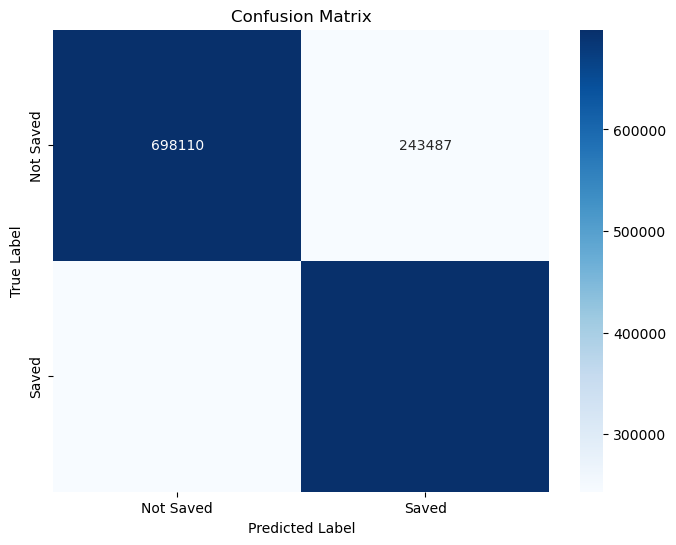

In [4]:
# Use model on the moral machine data
# features = ['if_cross_by_rule', 'if_more_people',
#        'if_more_male', 'if_more_female', 'if_more_young_male',
#        'if_more_young_female', 'if_more_senior_male', 'if_more_senior_female',
#        'if_more_large_male', 'if_more_large_female',
#        'if_more_professional_male', 'if_more_professional_female',
#        'if_more_vulnerable', 'if_more_children', 'if_more_senior',
#        'if_more_criminal', 'if_more_homeless', 'if_more_profession',
#        'if_more_large', 'if_more_animal']
features = ['if_cross_by_rule', 'if_more_people',
       'if_more_male', 'if_more_female', 
       'if_more_vulnerable', 'if_more_children', 'if_more_senior',
       'if_more_criminal', 'if_more_homeless', 'if_more_profession',
       'if_more_large', 'if_more_animal']
model = RankNetModel(features)
model.train(train_df, val_df)
model.load_model()
predictions_df = model.predict(test_df)
model.evaluate(predictions_df)


Model Evaluation Metrics:
Accuracy: 0.7414
Precision: 0.7414
Recall: 0.7414
F1 Score: 0.7414
ROC AUC: 0.7976


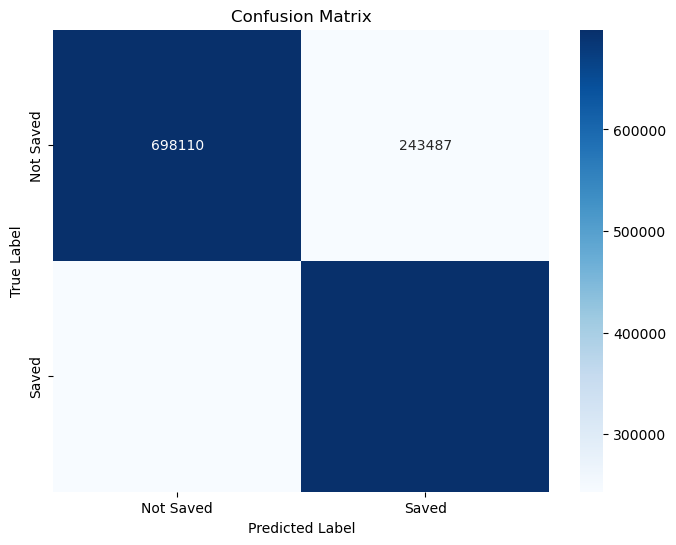

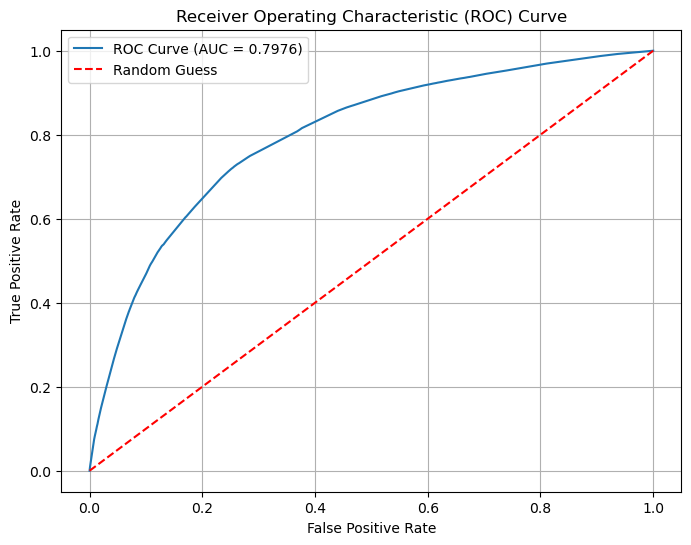

In [5]:
# evaluate
y_true = predictions_df['True Label']
y_pred = predictions_df['Predicted Saved']
y_probs = predictions_df['Predicted Probability']

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_probs)

print("\nModel Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Saved', 'Saved'], yticklabels=['Not Saved', 'Saved'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_true, y_probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()


In [32]:
predictions_df.columns

Index(['ResponseID', 'Predicted Probability', 'True Label', 'Predicted Saved'], dtype='object')

In [7]:
# test_df
test_df['ResponseID'] = test_df['ResponseID'].astype(str)
predictions_df['ResponseID'] = predictions_df['ResponseID'].astype(str)
predictions_df1 = predictions_df
predictions_df1['Saved'] = predictions_df1['True Label']

ranknet_predict = test_df.merge(predictions_df1, on=['ResponseID', 'Saved'], how='inner')

ranknet_predict.shape

/var/folders/x5/b6qvk1zx3dg9d_8_8zt4hf3m0000gn/T/ipykernel_11174/2128501558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['ResponseID'] = test_df['ResponseID'].astype(str)


(1883194, 70)

In [8]:
ranknet_predict.to_csv('ranknet_mode_result_1225.csv')

In [9]:
ranknet_metrics = {
    'accuracy': accuracy_score(y_true, y_pred),
    'precision': precision_score(y_true, y_pred),
    'recall': recall_score(y_true, y_pred),
    'f1_score': f1_score(y_true, y_pred),
    'roc_auc': roc_auc_score(y_true, y_probs),
    'confusion_matrix': confusion_matrix(y_true, y_pred).tolist()
}

In [10]:
import json
# Save metrics to JSON
output_path = 'ranknet_metrics_1225.json'
with open(output_path, 'w') as f:
    json.dump(ranknet_metrics, f, indent=4)

print(f"Metrics saved to {output_path}")


Metrics saved to ranknet_metrics_1225.json


LambdaMart

In [3]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import json

# Group and target columns
group_col = 'ResponseID'
target_col = 'Saved'

# Prepare XGBoost datasets
train_groups = train_df[group_col].value_counts(sort=False).sort_index().tolist()
val_groups = val_df[group_col].value_counts(sort=False).sort_index().tolist()

train_data = xgb.DMatrix(train_df[important_features], label=train_df[target_col])
val_data = xgb.DMatrix(val_df[important_features], label=val_df[target_col])

train_data.set_group(train_groups)
val_data.set_group(val_groups)

params = {
    'objective': 'rank:ndcg', 
    'learning_rate': 0.1,
    'max_depth': 6,
    'n_estimators': 100,
    'eval_metric': 'ndcg',
    'seed': 42
}

model = xgb.train(
    params,
    train_data,
    num_boost_round=100,
    evals=[(val_data, 'validation')],
    early_stopping_rounds=10
)

model.save_model('xgboost_lambdamart_model.json')

test_groups = test_df[group_col].value_counts(sort=False).sort_index().tolist()
test_data = xgb.DMatrix(X_test)

predictions = model.predict(test_data)
test_df['Predicted Probability'] = predictions

test_df['ResponseID'] = test_df['ResponseID'].astype(str)
final_predictions = []
for response_id, group in test_df.groupby('ResponseID'):
    group = group.sort_values(by='Predicted Probability', ascending=False)
    group['Predicted Saved'] = [1 if idx == 0 else 0 for idx in range(len(group))]
    final_predictions.append(group)

predictions_df = pd.concat(final_predictions)

y_true = predictions_df[target_col]
y_pred = predictions_df['Predicted Saved']
y_probs = predictions_df['Predicted Probability']

metrics = {
    'accuracy': accuracy_score(y_true, y_pred),
    'precision': precision_score(y_true, y_pred),
    'recall': recall_score(y_true, y_pred),
    'f1_score': f1_score(y_true, y_pred),
    'roc_auc': roc_auc_score(y_true, y_probs),
    'confusion_matrix': confusion_matrix(y_true, y_pred).tolist()
}

with open('lambdamart1_metrics.json', 'w') as f:
    json.dump(metrics, f, indent=4)

print("Metrics saved to metrics.json")


/Applications/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [05:04:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	validation-ndcg:0.91241
[1]	validation-ndcg:0.91364
[2]	validation-ndcg:0.91400
[3]	validation-ndcg:0.91428
[4]	validation-ndcg:0.91471
[5]	validation-ndcg:0.91504
[6]	validation-ndcg:0.91500
[7]	validation-ndcg:0.91512
[8]	validation-ndcg:0.91510
[9]	validation-ndcg:0.91530
[10]	validation-ndcg:0.91541
[11]	validation-ndcg:0.91538
[12]	validation-ndcg:0.91690
[13]	validation-ndcg:0.91687
[14]	validation-ndcg:0.91694
[15]	validation-ndcg:0.91702
[16]	validation-ndcg:0.91698
[17]	validation-ndcg:0.91701
[18]	validation-ndcg:0.91704
[19]	validation-ndcg:0.91706
[20]	validation-ndcg:0.91707
[21]	validation-ndcg:0.91709
[22]	validation-ndcg:0.91708
[23]	validation-ndcg:0.91709
[24]	validation-ndcg:0.91709
[25]	validation-ndcg:0.91716
[26]	validation-ndcg:0.91718
[27]	validation-ndcg:0.91717
[28]	validation-ndcg:0.91716
[29]	validation-ndcg:0.91719
[30]	validation-ndcg:0.91717
[31]	validation-ndcg:0.91722
[32]	validation-ndcg:0.91721
[33]	validation-ndcg:0.91721
[34]	validation-ndcg:0.9

/var/folders/x5/b6qvk1zx3dg9d_8_8zt4hf3m0000gn/T/ipykernel_32546/3831058801.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Predicted Probability'] = predictions
/var/folders/x5/b6qvk1zx3dg9d_8_8zt4hf3m0000gn/T/ipykernel_32546/3831058801.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['ResponseID'] = test_df['ResponseID'].astype(str)


Metrics saved to metrics.json


Model Analysis

In [ ]:
ranknet_df = pd.read_csv('ranknet_mode_result_1225.csv')
lamdamart_df = pd.read_csv('0102_lambdamart_test.csv')

Analysis 1: two models' accuracy, recall, precision, confusion matrix cpmparasion

In [30]:
import json

with open('lambdamart1_metrics.json', 'r') as file:
    lambdamart = json.load(file)

print(lambdamart)

with open('ranknet_metrics_1225.json', 'r') as file:
    ranknet = json.load(file)

print(ranknet)

{'accuracy': 0.7412597958574635, 'precision': 0.7412597958574635, 'recall': 0.7412597958574635, 'f1_score': 0.7412597958574635, 'roc_auc': 0.7969254490882051, 'confusion_matrix': [[697968, 243629], [243629, 697968]]}
{'accuracy': 0.741410603474735, 'precision': 0.741410603474735, 'recall': 0.741410603474735, 'f1_score': 0.741410603474735, 'roc_auc': 0.7976443295027132, 'confusion_matrix': [[698110, 243487], [243487, 698110]]}


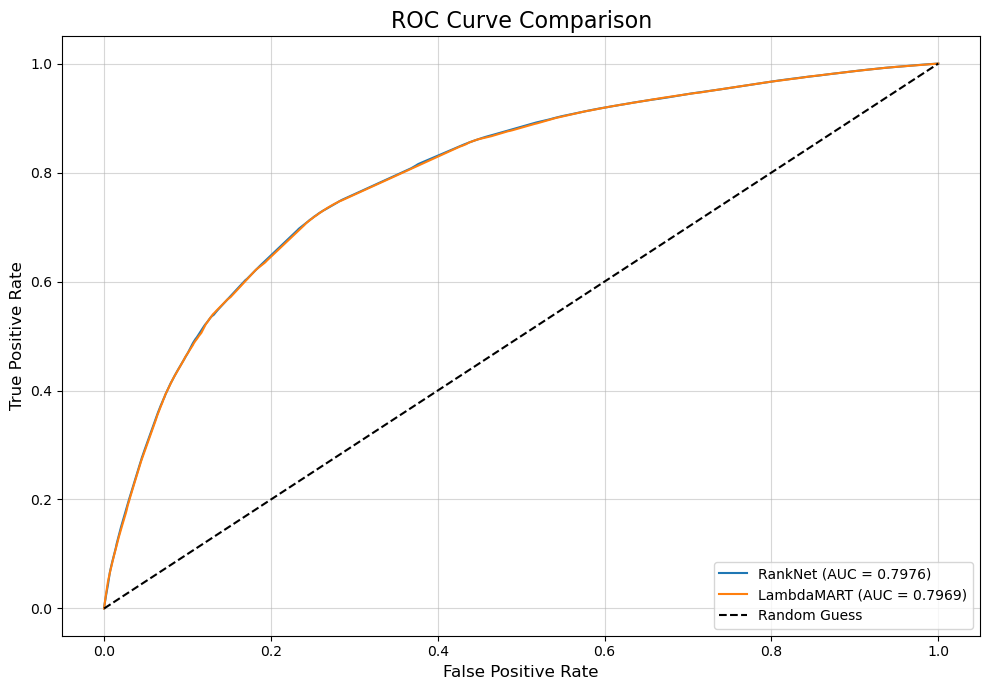

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

#plot AUC-ROC
def plot_auc_from_predictions(predictions_dfs, model_names):
    plt.figure(figsize=(10, 7))

    for predictions_df, name in zip(predictions_dfs, model_names):
        true_labels = predictions_df['True Label'].values
        predicted_scores = predictions_df['Predicted Probability'].values

        fpr, tpr, _ = roc_curve(true_labels, predicted_scores)
        auc = roc_auc_score(true_labels, predicted_scores)

        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.4f})")

    plt.plot([0, 1], [0, 1], linestyle="--", color="black", label="Random Guess")

    plt.xlabel("False Positive Rate", fontsize=12)
    plt.ylabel("True Positive Rate", fontsize=12)
    plt.title("ROC Curve Comparison", fontsize=16)
    plt.legend(loc="lower right", fontsize=10)
    plt.grid(alpha=0.5)
    plt.tight_layout()
    plt.show()

plot_auc_from_predictions(
    predictions_dfs=[ranknet_df, lamdamart_df],
    model_names=["RankNet", "LambdaMART"]
)


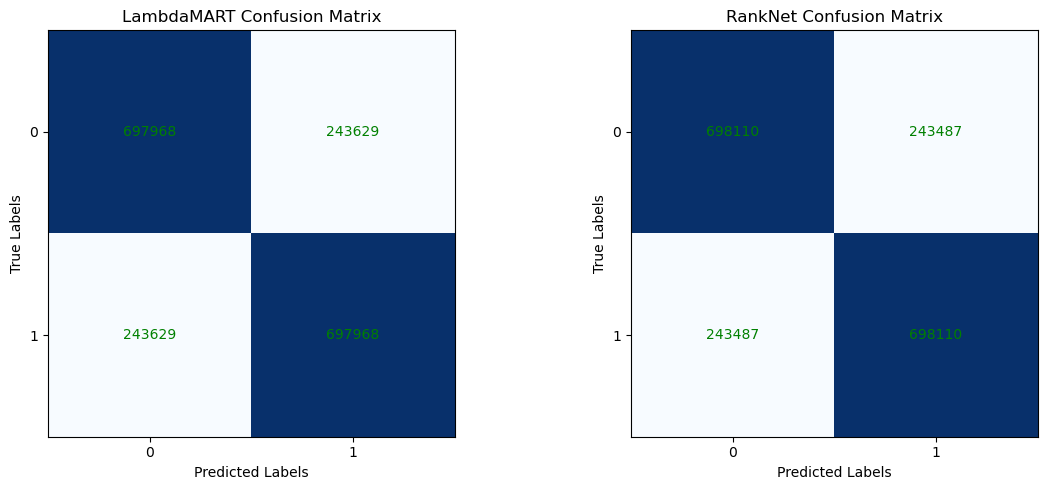

In [40]:
import matplotlib.pyplot as plt

# two models' confusion matrix
conf_matrices = {"LambdaMART": lambdamart["confusion_matrix"], "RankNet": ranknet["confusion_matrix"]}

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for ax, (model, cm) in zip(axes, conf_matrices.items()):
    im = ax.imshow(cm, cmap="Blues", interpolation="nearest")
    ax.set_title(f"{model} Confusion Matrix")
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(["0", "1"])
    ax.set_yticklabels(["0", "1"])

    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i][j], ha="center", va="center", color="green")

plt.tight_layout()
plt.show()

Analysis 2: calculate MAP, NDCG, Kendall's Tau

In [19]:
import numpy as np

# calculate MAP
def average_precision(true_labels, predicted_scores):
    order = np.argsort(predicted_scores)[::-1]
    true_labels = np.take(true_labels, order)
    
    precisions = [np.mean(true_labels[:i + 1]) for i in range(len(true_labels)) if true_labels[i] == 1]
    
    return np.mean(precisions) if precisions else 0.0

def mean_average_precision(true_labels, predicted_scores):
    return average_precision(true_labels, predicted_scores)


In [20]:
import numpy as np

# calculate NDCG
def ndcg_at_k(true_labels, predicted_scores, k=10):
    order = np.argsort(predicted_scores)[::-1]
    true_labels = np.take(true_labels, order[:k])
    
    gains = 2 ** true_labels - 1
    discounts = np.log2(np.arange(1, k + 1) + 1)
    dcg = np.sum(gains / discounts)
    
    sorted_labels = np.sort(true_labels)[::-1]
    ideal_gains = 2 ** sorted_labels - 1
    idcg = np.sum(ideal_gains / discounts)
    
    return dcg / idcg if idcg > 0 else 0.0


In [21]:
from scipy.stats import kendalltau

# calculate Kendall's Tau
def kendalls_tau(true_labels, predicted_scores):
    return kendalltau(true_labels, predicted_scores).correlation

In [18]:
predictions_df.to_csv('0102_lambdamart_test.csv')

In [28]:
true_labels1 = ranknet_df['True Label'].values
predicted_scores1 = ranknet_df['Predicted Saved'].values

true_labels2 = lamdamart_df['True Label'].values
predicted_scores2 = lamdamart_df['Predicted Saved'].values

In [29]:
# MAP
map_score1 = mean_average_precision(true_labels1, predicted_scores1)
map_score2 = mean_average_precision(true_labels2, predicted_scores2)
print(f"RankNet's MAP: {map_score1:.4f}")
print(f"LambdaMart's MAP: {map_score2:.4f}")

# NDCG
ndcg1 = ndcg_at_k(true_labels1, predicted_scores1, k=10)
ndcg2 = ndcg_at_k(true_labels2, predicted_scores2, k=10)
print(f"RankNet's NDCG@10: {ndcg1:.4f}")
print(f"LambdaMart's NDCG@10: {ndcg2:.4f}")

# Kendall's Tau
kendall_tau1 = kendalls_tau(true_labels1, predicted_scores1)
kendall_tau2 = kendalls_tau(true_labels2, predicted_scores2)

print(f"RankNet - Kendall's Tau: {kendall_tau1:.4f}")
print(f"LambdaMart - Kendall's Tau: {kendall_tau2:.4f}")

RankNet's MAP: 0.7056
LambdaMart's MAP: 0.7034
RankNet's NDCG@10: 0.8036
LambdaMart's NDCG@10: 0.9860
RankNet - Kendall's Tau: 0.4828
LambdaMart - Kendall's Tau: 0.4825


Sortnet

In [18]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import json

# Features to use for training
important_features = ['if_cross_by_rule', 'if_more_people',
       'if_more_male', 'if_more_female', 'if_more_young_male',
       'if_more_young_female', 'if_more_senior_male', 'if_more_senior_female',
       'if_more_large_male', 'if_more_large_female',
       'if_more_professional_male', 'if_more_professional_female',
       'if_more_vulnerable', 'if_more_children', 'if_more_senior',
       'if_more_criminal', 'if_more_homeless', 'if_more_profession',
       'if_more_large', 'if_more_animal']

# Combined rank for features using Borda Count
combined_rank_df = feature_importance_df[['Feature', 'Combined Rank Score']].sort_values(by='Combined Rank Score')

# Assigning feature weights based on combined rank
feature_weights = dict(zip(combined_rank_df['Feature'], 1 / combined_rank_df['Combined Rank Score']))

# Normalize feature weights
total_weight = sum(feature_weights.values())
feature_weights = {key: val / total_weight for key, val in feature_weights.items()}

# Dataset for SortNet
class PairwiseDataset(Dataset):
    def __init__(self, X, pairs, labels):
        self.X = X
        self.pairs = pairs
        self.labels = labels

    def __len__(self):
        return len(self.pairs)

    def __getitem__(self, idx):
        idx1, idx2 = self.pairs[idx]
        return self.X[idx1], self.X[idx2], self.labels[idx]

# SortNet model
class SortNet(nn.Module):
    def __init__(self, input_dim):
        super(SortNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()

    def forward(self, x1, x2):
        # Compare pairs
        score1 = self.fc3(self.relu(self.fc2(self.relu(self.fc1(x1)))))
        score2 = self.fc3(self.relu(self.fc2(self.relu(self.fc1(x2)))))
        return score1 - score2

# Group and target columns
group_col = 'ResponseID'
target_col = 'Saved'

# Prepare dataset
X_train = train_df[important_features].values
X_val = val_df[important_features].values
X_test = test_df[important_features].values

train_pairs = [(i, j) for i in range(len(train_df)) for j in range(len(train_df)) if train_df[group_col].iloc[i] == train_df[group_col].iloc[j] and i != j]
val_pairs = [(i, j) for i in range(len(val_df)) for j in range(len(val_df)) if val_df[group_col].iloc[i] == val_df[group_col].iloc[j] and i != j]

def create_labels(df, pairs):
    return [1 if df[target_col].iloc[i] > df[target_col].iloc[j] else -1 for i, j in pairs]

train_labels = create_labels(train_df, train_pairs)
val_labels = create_labels(val_df, val_pairs)

dataset_train = PairwiseDataset(X_train, train_pairs, train_labels)
dataset_val = PairwiseDataset(X_val, val_pairs, val_labels)

dataloader_train = DataLoader(dataset_train, batch_size=32, shuffle=True)
dataloader_val = DataLoader(dataset_val, batch_size=32, shuffle=False)

# Initialize model
model = SortNet(input_dim=X_train.shape[1])
criterion = nn.MarginRankingLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train model
for epoch in range(10):
    model.train()
    train_loss = 0.0
    for x1, x2, y in dataloader_train:
        optimizer.zero_grad()
        outputs = model(x1, x2).squeeze()
        loss = criterion(outputs, y.float())
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {train_loss / len(dataloader_train)}")

# Predict on test data
model.eval()
test_df['Predicted Probability'] = 0.0
for i in range(len(test_df)):
    scores = []
    for j in range(len(test_df)):
        if test_df[group_col].iloc[i] == test_df[group_col].iloc[j] and i != j:
            score = model(torch.tensor(X_test[i]).float(), torch.tensor(X_test[j]).float()).item()
            scores.append(score)
    test_df['Predicted Probability'].iloc[i] = max(scores) if scores else 0.0

# Group by ResponseID and assign Predicted Saved
test_df['ResponseID'] = test_df['ResponseID'].astype(str)
final_predictions = []
for response_id, group in test_df.groupby('ResponseID'):
    group = group.sort_values(by='Predicted Probability', ascending=False)
    group['Predicted Saved'] = [1 if idx == 0 else 0 for idx in range(len(group))]
    final_predictions.append(group)

predictions_df = pd.concat(final_predictions)

# Evaluate model
y_true = predictions_df[target_col]
y_pred = predictions_df['Predicted Saved']
y_probs = predictions_df['Predicted Probability']

metrics = {
    'accuracy': accuracy_score(y_true, y_pred),
    'precision': precision_score(y_true, y_pred),
    'recall': recall_score(y_true, y_pred),
    'f1_score': f1_score(y_true, y_pred),
    'roc_auc': roc_auc_score(y_true, y_probs),
    'confusion_matrix': confusion_matrix(y_true, y_pred).tolist()
}

# Save metrics to JSON
with open('metrics.json', 'w') as f:
    json.dump(metrics, f, indent=4)

print("Metrics saved to metrics.json")

KeyboardInterrupt: 